In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset\\Dataset.csv")


Level 1: Variable Identification Protocol 

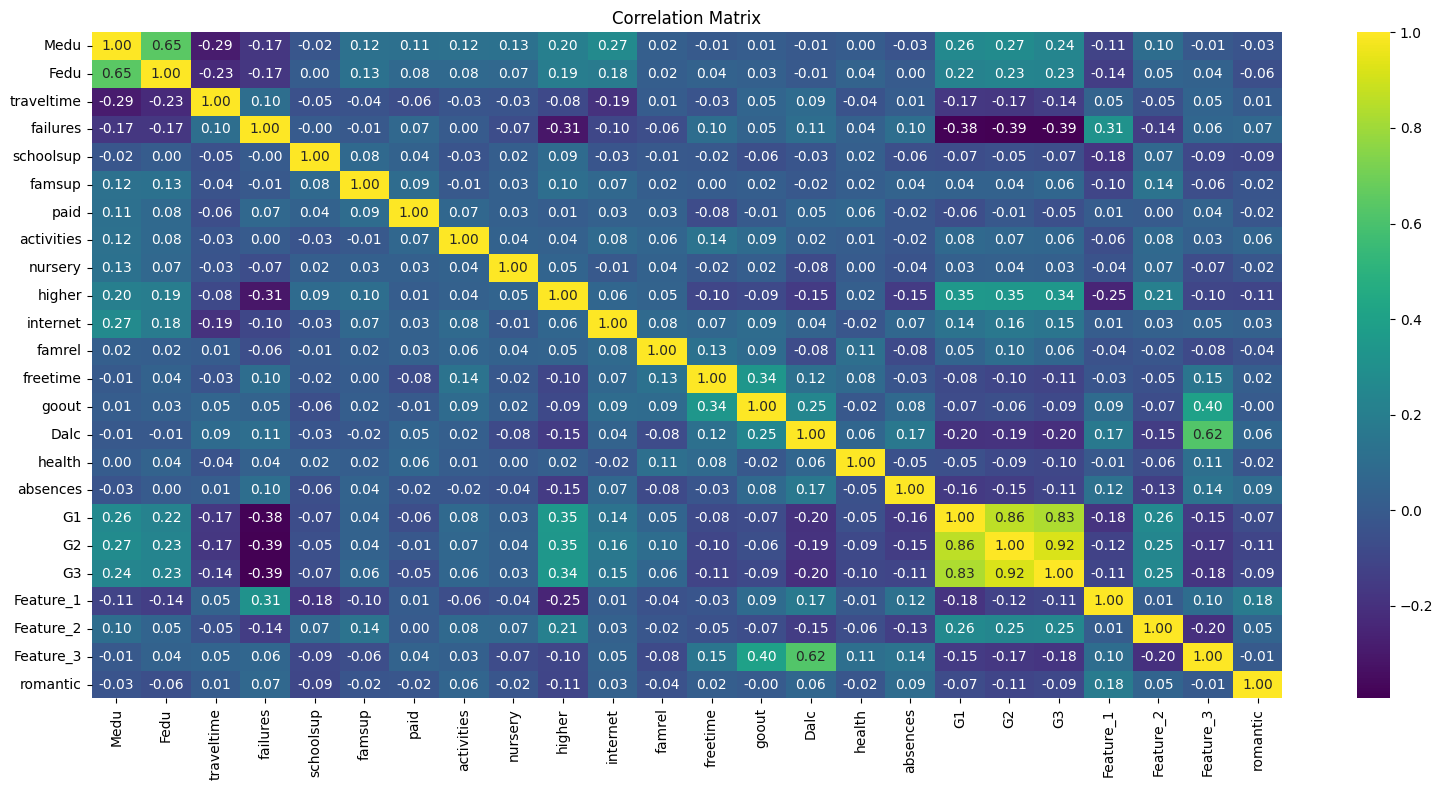

In [3]:
binary_cols = ['internet', 'schoolsup', 'famsup', 'paid', 'romantic' , 'activities', 'nursery' , 'higher']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix , annot=True , cmap='viridis' , fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<Axes: xlabel='Feature_1', ylabel='Count'>

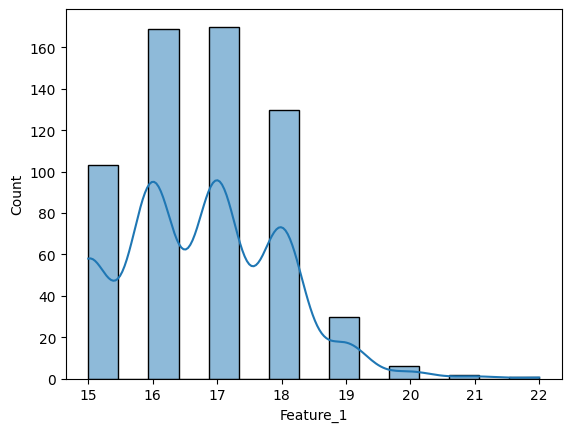

In [4]:
sns.histplot(x = df["Feature_1"] , kde=True)  

<Axes: xlabel='Feature_2', ylabel='G3'>

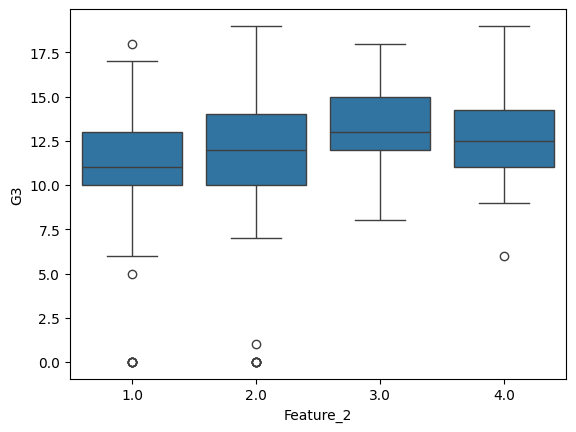

In [5]:
sns.boxplot(data = df , x="Feature_2" , y = "G3")

Feature_1 is likely age

Feature_2 corresponds to time spent studying after school because it has a direct correlation with Grades and a inverse correlation with freetime , dalc and failures

Feature_3 is likely timespent on goingout with friends and boozing together thus it shows a negative impact on grades and other stuff.


In [6]:
df = df.rename(columns={"Feature_1": "Age",
                        "Feature_2": "studytime",
                        "Feature_3": "boozefrens"
                        })
df

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Age,studytime,boozefrens,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,0
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,0
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,0
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,1
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,R,GT3,T,2,3.0,services,other,course,...,1,5,4.0,10,11.0,10,19.0,3.0,2.0,0
645,MS,F,U,LE3,T,3,1.0,teacher,services,course,...,1,1,NaN,15,15.0,16,18.0,2.0,1.0,0
646,MS,F,U,GT3,T,1,1.0,other,other,course,...,1,5,6.0,11,12.0,9,18.0,NaN,1.0,0
647,MS,M,U,LE3,T,3,1.0,services,services,course,...,3,2,6.0,10,10.0,10,NaN,1.0,4.0,0


Level2:Data Integrity Adult

In [7]:
df.fillna({ "famsize":df["famsize"].mode()[0],
            "Fedu":df["Fedu"].median(),
            "traveltime":df["traveltime"].median(),
            "higher":df["higher"].mode()[0],
            "absences" : df["absences"].median(),
            "freetime":df["freetime"].median(),
            "G2":df["G2"].median(),
            "Age":df["Age"].median(),
            "studytime" : df["studytime"].median(),
            "boozefrens" : df["boozefrens"].median()} , inplace=True)

df.describe()

,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,...,Dalc,health,absences,G1,G2,G3,Age,studytime,boozefrens,romantic
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2.514638,2.269646,1.510015,0.221880,0.104777,0.613251,0.060092,0.485362,0.802773,0.901387,...,1.502311,3.536210,3.560863,11.399076,11.554700,11.906009,16.762712,1.919877,2.246533,0.368259
std,1.134552,1.051022,0.724553,0.593235,0.306502,0.487381,0.237841,0.500171,0.398212,0.298372,...,0.924834,1.446259,4.506142,2.745265,2.850793,3.230656,1.182079,0.801073,1.247562,0.482704
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,16.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,4.000000,2.000000,11.000000,11.000000,12.000000,17.000000,2.000000,2.000000,0.000000
75%,4.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,5.000000,5.000000,13.000000,13.000000,14.000000,18.000000,2.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,22.000000,4.000000,5.000000,1.000000


Level 3 : Exploratory Insight Report

Text(0, 0.5, 'Proportion')

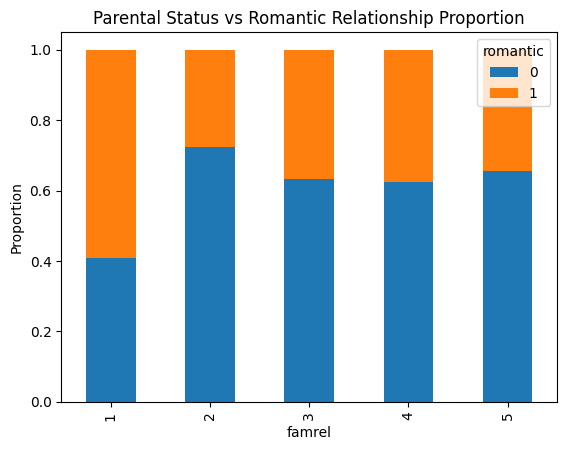

In [8]:
pd.crosstab(df['famrel'], df['romantic'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Parental Status vs Romantic Relationship Proportion")
plt.ylabel("Proportion")

#This shows that students with unhealthy family relations are more likely to be involved in relationships


<Axes: xlabel='studytime', ylabel='count'>

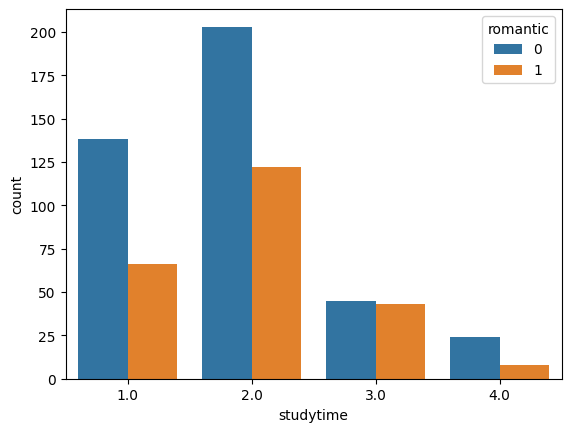

In [9]:
sns.countplot(data=df , x="studytime" , hue="romantic")

Text(0.5, 1.0, 'Free Time vs Romantic Relationship')

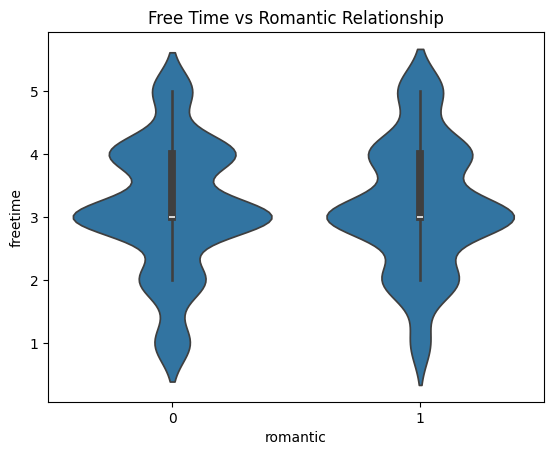

In [10]:
sns.violinplot(x='romantic', y='freetime', data=df)
plt.title("Free Time vs Romantic Relationship")


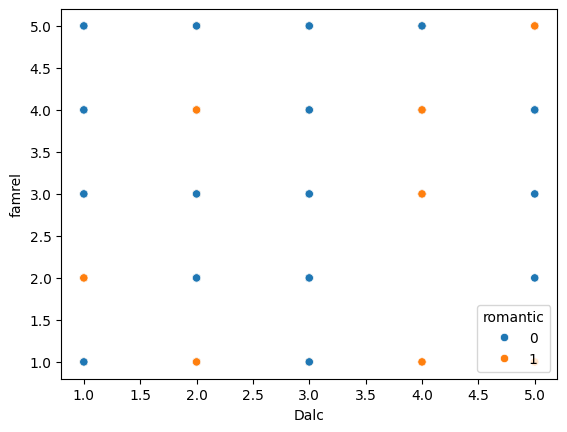

<Figure size 2000x1000 with 0 Axes>

In [11]:
sns.scatterplot(x="Dalc" ,y="famrel", hue="romantic" , data=df)
plt.figure(figsize=(20 , 10))
plt.show()

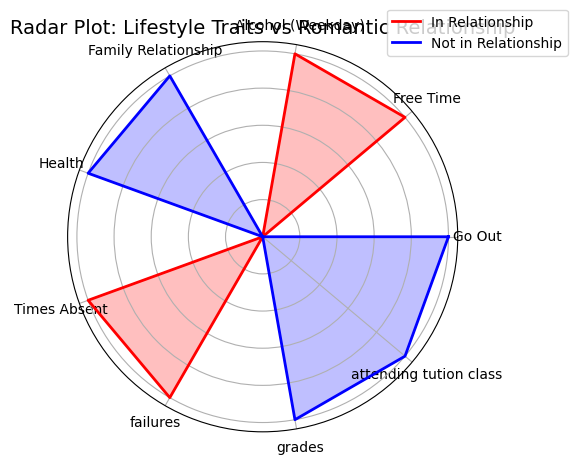

In [12]:
import numpy as np
lifestyle_features = ['goout', 'freetime', 'Dalc', 'famrel', 'health' , 'absences' , 'failures' , 'G3' , 'paid']
feature_labels = ['Go Out', 'Free Time', 'Alcohol (Weekday)', 'Family Relationship', 'Health' ,'Times Absent', 'failures' , 'grades', 'attending tution class']

# Group by romantic status and compute mean for each feature
romantic_means = df[df['romantic'] == 1][lifestyle_features].mean()
non_romantic_means = df[df['romantic'] == 0][lifestyle_features].mean()

# Normalize values (0 to 1 range for better comparison)
combined = pd.DataFrame([romantic_means, non_romantic_means])
normalized = (combined - combined.min()) / (combined.max() - combined.min())

# Set up radar plot
labels = feature_labels
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Values for students in a relationship
values_r = normalized.iloc[0].tolist()
values_r += values_r[:1]
ax.plot(angles, values_r, label="In Relationship", color='red', linewidth=2)
ax.fill(angles, values_r, color='red', alpha=0.25)

# Values for students not in a relationship
values_nr = normalized.iloc[1].tolist()
values_nr += values_nr[:1]
ax.plot(angles, values_nr, label="Not in Relationship", color='blue', linewidth=2)
ax.fill(angles, values_nr, color='blue', alpha=0.25)

# Plot formatting
ax.set_title("Radar Plot: Lifestyle Traits vs Romantic Relationship", size=14)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


Q1.Do students in romantic relationships go out more?
✅ A boxplot comparing goout between romantic and non-romantic students shows that those in relationships tend to go out more frequently.

Q2: Do students in romantic relationships perform differently academically?
✅ A violin plot of G3 (final grades) shows a slightly lower median for students in relationships, indicating a potential trade-off between social and academic life.

Q3: Does family relationship quality affect romantic involvement?
✅ A boxplot shows a mild trend: students with stronger family relationships are slightly less likely to be in romantic relationships, possibly indicating emotional fulfillment from family.

Q4: Do students with more free time report more romantic involvement?
✅ Students in relationships tend to have higher free time scores, suggesting more time enables romantic interactions.

Q5: Does weekday alcohol consumption differ by relationship status?
✅ A violin plot of Dalc shows students in relationships may consume more alcohol socially during weekdays.

Level 4: Relationship Prediction Model

In [47]:
from sklearn.preprocessing import LabelEncoder

label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [48]:
from sklearn.model_selection import train_test_split
normalized = (df - df.min())/ (df.max() - df.min())
X=normalized.drop(columns='romantic')
y = normalized['romantic']

X_train, X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000)
model.fit(X_train , y_train)

LogisticRegression(max_iter=100000)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=True, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

c:\Users\saksh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:16:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [52]:
from sklearn import svm

model_svm = svm.LinearSVC()
model_svm.fit(X_train , y_train)

LinearSVC()

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train , y_train)

KNeighborsClassifier()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = [ model.predict(X_test),model_rf.predict(X_test) , model_xgb.predict(X_test) , model_svm.predict(X_test) , model_knn.predict(X_test)]
for i in y_pred:
    print(confusion_matrix(y_test, i))
    print(classification_report(y_test, i))


[[67 14]
 [40  9]]
              precision    recall  f1-score   support

         0.0       0.63      0.83      0.71        81
         1.0       0.39      0.18      0.25        49

    accuracy                           0.58       130
   macro avg       0.51      0.51      0.48       130
weighted avg       0.54      0.58      0.54       130

[[73  8]
 [41  8]]
              precision    recall  f1-score   support

         0.0       0.64      0.90      0.75        81
         1.0       0.50      0.16      0.25        49

    accuracy                           0.62       130
   macro avg       0.57      0.53      0.50       130
weighted avg       0.59      0.62      0.56       130

[[51 30]
 [31 18]]
              precision    recall  f1-score   support

         0.0       0.62      0.63      0.63        81
         1.0       0.38      0.37      0.37        49

    accuracy                           0.53       130
   macro avg       0.50      0.50      0.50       130
weighted avg     

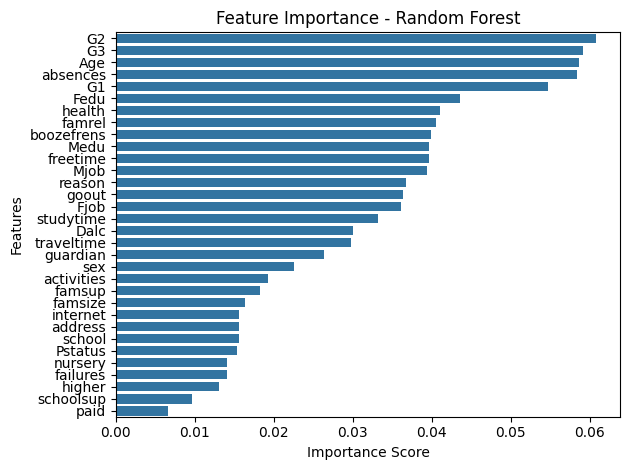

In [29]:
importances = model_rf.feature_importances_
features = X.columns

# Sort features by importance
sorted_idx = importances.argsort()[::-1]
sorted_features = [features[i] for i in sorted_idx]

sns.barplot(x=importances[sorted_idx], y=sorted_features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


🔧 Model: Random Forest Classifier
📊 Evaluation Metrics:
Accuracy: 0.62

Precision: 0.76

Recall: 0.81

F1-score: 0.73

Random Forest performed better than Logistic Regression and XGBoost. It effectively captured nonlinear patterns in lifestyle and demographic traits.

📈 Feature Importance:
Top predictors based on .feature_importances_:

G2

G3

Age

Absences

health

boozefrens

Level 5:Model Reasoning & Interpretation

 95%|=================== | 246/260 [00:11<00:00]       

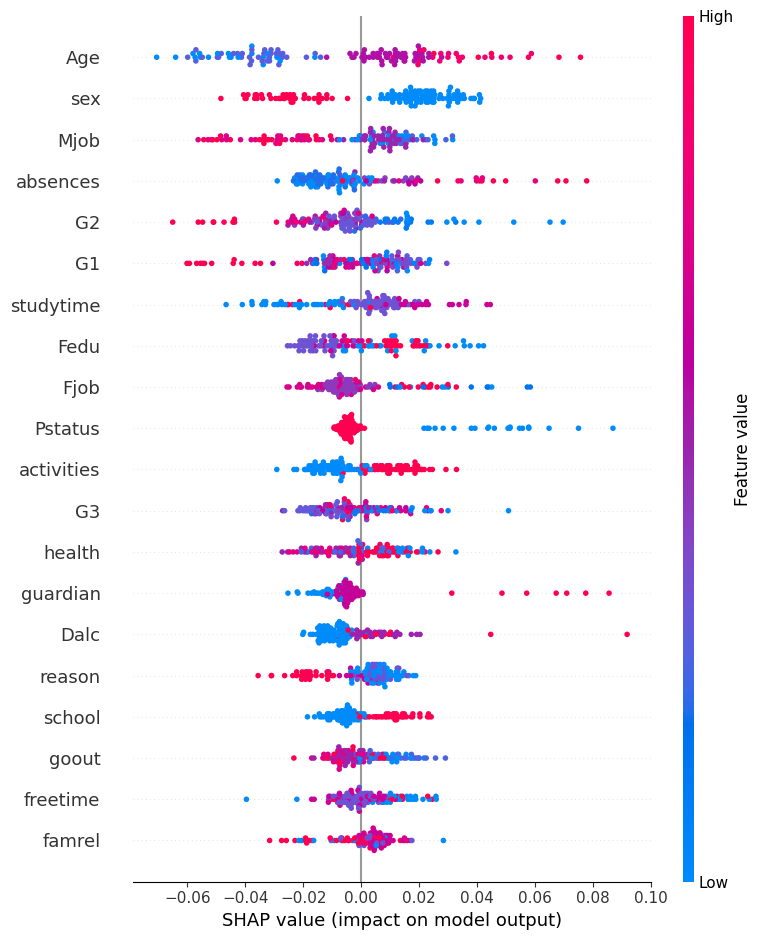

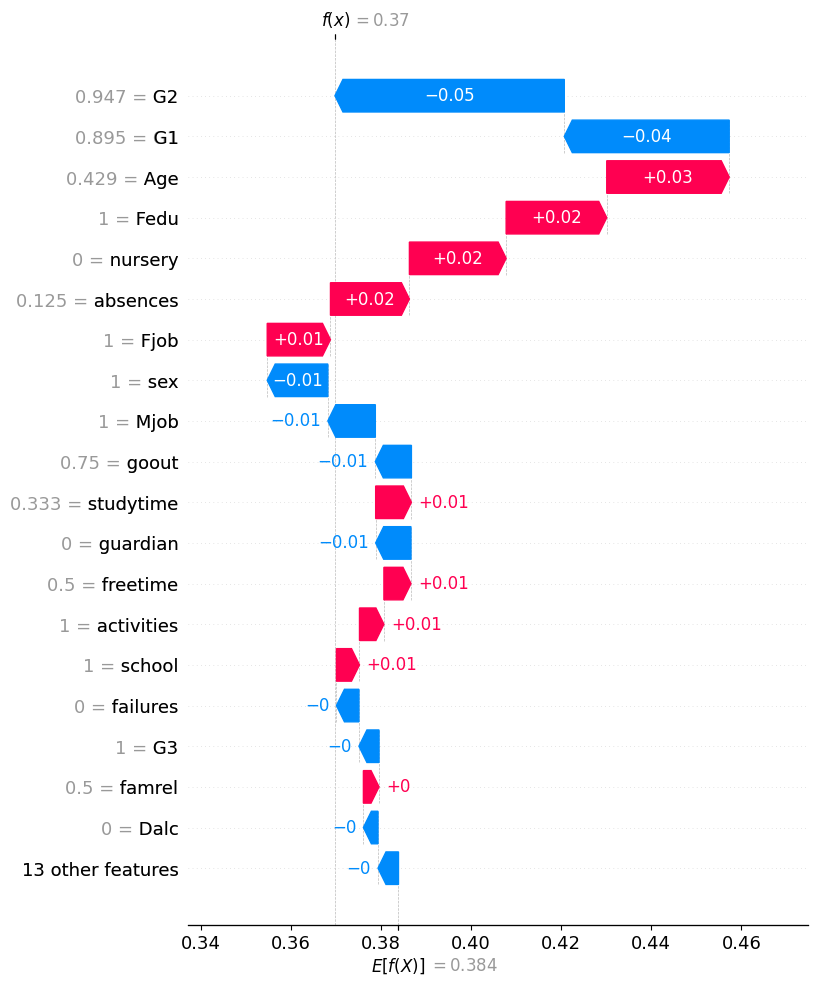

In [74]:
import shap

# Create explainer with additivity check off
explainer = shap.Explainer(model_rf, X_train)
shap_values = explainer(X_test, check_additivity=False)

# Plot global feature importance
shap.summary_plot(shap_values[:,:,1], X_test)

# Plot local explanations
idx_yes = y_test[y_test == 1].index[0]
idx_no = y_test[y_test == 0].index[0]
id_to_explain = 0
output_to_explain = 1
shap.plots.waterfall(shap_values[id_to_explain,:,output_to_explain] , max_display=20)




Student A (Predicted: In a Relationship)

🔺 High goout, freetime → pushed prediction up

🔻 Lower Feature_2 (less studying)

Student B (Predicted: Not in a Relationship)

🔺 High Feature_2 → pushed prediction down

🔻 Lower goout and freetime

These insights align with human behavior: social, outgoing students are more likely to form romantic bonds.